# Gradient Descent 

In [1]:
import pandas as pd
housing = pd.read_csv("Housing.csv")
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [2]:
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})

housing.head()

price  area  bedrooms  bathrooms  stories  mainroad guestroom basement  \
0  13300000  7420         4          2        3         1        no       no   
1  12250000  8960         4          4        4         1        no       no   
2  12250000  9960         3          2        2         1        no      yes   
3  12215000  7500         4          2        2         1        no      yes   
4  11410000  7420         4          1        2         1       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [4]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

housing = pd.concat([housing, status], axis = 1)

housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [5]:
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0

In [6]:
# normalizing the dataset

housing = (housing - housing.mean()) / housing.std()

housing.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.562174  1.045766  1.402131   1.420507  1.376952  0.405251  -0.464888   
1  4.000809  1.755397  1.402131   5.400847  2.529700  0.405251  -0.464888   
2  4.000809  2.216196  0.047235   1.420507  0.224204  0.405251  -0.464888   
3  3.982096  1.082630  1.402131   1.420507  0.224204  0.405251  -0.464888   
4  3.551716  1.045766  1.402131  -0.569663  0.224204  0.405251   2.147110   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0 -0.733865        -0.219063         1.471267  1.516299  1.803284   
1 -0.733865        -0.219063         1.471267  2.676950 -0.553526   
2  1.360148        -0.219063        -0.678439  1.516299  1.803284   
3  1.360148        -0.219063         1.471267  2.676950  1.803284   
4  1.360148        -0.219063         1.471267  1.516299 -0.553526   

   semi-furnished  unfurnished  
0       -0.844113     -0.69579  
1       -0.844113     -0.69579  
2        1.182502     -0.69579  
3       -0.844113     -0.69579  
4       -0.844113     -0.69579

In [7]:
import seaborn as sns
%matplotlib inline

/home/heman/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


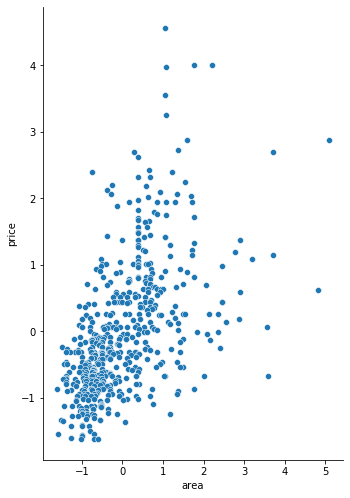

In [8]:
sns.pairplot(housing, x_vars = 'area', y_vars='price', size=7, aspect=0.7, kind='scatter')

**For linear regression we use a cost function known as MSE ( Mean Square Error )**

<img src="gd1.png" />


find the least value of m and c for which our cost function get the lowest value possible.


<img src="gd2.png" />


In [9]:
import numpy as np

x = housing['area']
y = housing['price']

x = np.array(x)
y = np.array(y)

In [10]:
def gradient_descent(x, y, m_current=0, c_current=0, inters = 1000, learning_rate=0.01):
    N = float(len(y))
    
    gd_df = pd.DataFrame(columns = ['m_current', 'c_current', 'cost'])
    
    for i in range(inters):
        y_current = (m_current * x) + c_current
        
        cost = sum([data**2 for data in (y - y_current)]) / N
        
        m_gradient = -(2/N) * sum(x * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        
        gd_df.loc[i] = [m_current, c_current, cost]
        
    return gd_df

In [11]:
gradient = gradient_descent(x, y)

gradient

m_current     c_current      cost
0     0.010700  5.003133e-18  0.998165
1     0.021187  1.817099e-17  0.986830
2     0.031464  2.873135e-17  0.975943
3     0.041536  2.908988e-17  0.965486
4     0.051407  2.847060e-17  0.955442
..         ...           ...       ...
995   0.535997  2.891876e-16  0.711399
996   0.535997  2.778450e-16  0.711399
997   0.535997  2.792873e-16  0.711399
998   0.535997  2.735101e-16  0.711399
999   0.535997  2.772257e-16  0.711399

[1000 rows x 3 columns]

In [12]:
gradient.reset_index()

index  m_current     c_current      cost
0        0   0.010700  5.003133e-18  0.998165
1        1   0.021187  1.817099e-17  0.986830
2        2   0.031464  2.873135e-17  0.975943
3        3   0.041536  2.908988e-17  0.965486
4        4   0.051407  2.847060e-17  0.955442
..     ...        ...           ...       ...
995    995   0.535997  2.891876e-16  0.711399
996    996   0.535997  2.778450e-16  0.711399
997    997   0.535997  2.792873e-16  0.711399
998    998   0.535997  2.735101e-16  0.711399
999    999   0.535997  2.772257e-16  0.711399

[1000 rows x 4 columns]

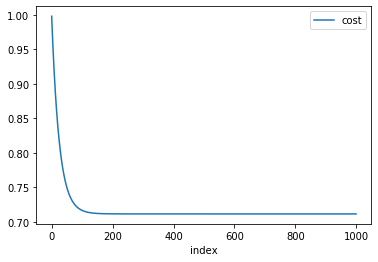

In [13]:
gradient.reset_index().plot.line(x = 'index', y=['cost'])

# Gradient Descent for Multiple Features

In [16]:
x = housing[['area', 'bedrooms']]
y = housing['price']

In [17]:
x['intercept'] = 1
x = x.reindex(['intercept', 'area', 'bedrooms'], axis=1)

x.head()

/home/heman/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


intercept      area  bedrooms
0          1  1.045766  1.402131
1          1  1.755397  1.402131
2          1  2.216196  0.047235
3          1  1.082630  1.402131
4          1  1.045766  1.402131

In [18]:
x = np.array(x)
y = np.array(y)

In [19]:
theta = np.matrix(np.array([0,0,0])) # vector representation pf coefficients

alpha = 0.01 # learning rate

interations = 1000

In [20]:
def compute_cost(x,y, theta):
    return np.sum(np.square(np.matmul(x,theta) - y)) / (2*len(y))

<img src="gd.png" />

In [25]:
def gradient_descent_multiple(x , y, theta, alpha, interations):
    theta = np.zeros(x.shape[1])
    
    m = len(x)
    
    gdm_df = pd.DataFrame(columns=['Theta', 'Cost'])
    
    for i in range(interations):
        gradient = (1/m) * np.matmul(x.T, np.matmul(x, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(x, y, theta)
        
        gdm_df.loc[i] = [theta, cost]
    
    return gdm_df

In [26]:
gradient_descent_multiple(x, y, theta, alpha, interations)

Theta      Cost
0    [-1.2100412415180605e-18, 0.005350138644096799...  0.494906
1    [3.976431823978542e-18, 0.010641328951860785, ...  0.490824
2    [4.567192699467158e-18, 0.015874226967184067, ...  0.486834
3    [5.858718199673304e-18, 0.02104948137493464, 0...  0.482935
4    [7.696188233089618e-18, 0.02616773358401028, 0...  0.479124
..                                                 ...       ...
995  [3.1663560662309414e-16, 0.4916558741575696, 0...  0.314176
996  [3.172548869891236e-16, 0.49165609672441335, 0...  0.314176
997  [3.1680264935340474e-16, 0.49165631727115444, ...  0.314176
998  [3.16664126113635e-16, 0.49165653581645713, 0....  0.314176
999  [3.1804121008546363e-16, 0.4916567523788097, 0...  0.314176

[1000 rows x 2 columns]